In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v6.0.0_vicious_cycle/ciff_sam/2022_02_17_15_25_21/count_data/'

In [3]:
figname = 'model_6.0.0'

In [4]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [5]:
births = pd.read_csv(output_dir +'births.csv').drop(columns='Unnamed: 0')
birth_count = births.loc[births.measure=='total_births']
bw_sum = births.loc[births.measure=='birth_weight_sum']
lbw_sum = births.loc[births.measure=='low_weight_births']
birth_count.head()

,sex,year,measure,input_draw,scenario,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
1536,female,2022,total_births,29,baseline,0.0,covered,bep,cat2
1537,female,2022,total_births,29,baseline,0.0,uncovered,bep,cat2
1538,female,2022,total_births,29,baseline,0.0,covered,mmn,cat2
1539,female,2022,total_births,29,baseline,0.0,uncovered,mmn,cat2
1540,female,2022,total_births,29,baseline,1338.0,covered,ifa,cat2


In [6]:
((bw_sum.groupby(['input_draw','scenario','sex']).sum()/birth_count.groupby(['input_draw','scenario','sex']).sum())
 .groupby(['scenario','sex']).describe())[['value']]

value                                       \
                           count         mean        std          min   
scenario            sex                                                 
baseline            female  12.0  3278.767962  37.576508  3219.163134   
                    male    12.0  3129.732527  25.140962  3088.752774   
lbwsg_interventions female  12.0  3316.653341  37.965159  3249.446832   
                    male    12.0  3167.554318  25.531545  3131.911136   
sqlns               female  12.0  3278.767962  37.576508  3219.163134   
                    male    12.0  3129.732527  25.140962  3088.752774   
wasting_treatment   female  12.0  3278.767962  37.576508  3219.163134   
                    male    12.0  3129.732527  25.140962  3088.752774   

                                                                                
                                    25%          50%          75%          max  
scenario            sex                                                         
baseline            female  3241.127239  3289.864536  3299.004381  3339.280103  
                    male    3112.483723  3131.421245  3152.186342  3164.166259  
lbwsg_interventions female  3285.677070  3322.981125  3334.803034  3374.954137  
                    male    3146.537891  3165.128415  3184.414538  3210.244025  
sqlns               female  3241.127239  3289.864536  3299.004381  3339.280103  
                    male    3112.483723  3131.421245  3152.186342  3164.166259  
wasting_treatment   female  3241.127239  3289.864536  3299.004381  3339.280103  
                    male    3112.483723  3131.421245  3152.186342  3164.166259

In [7]:
(lbw_sum.groupby(['scenario','sex']).sum()/birth_count.groupby(['scenario','sex']).sum())[['value']]

value
scenario            sex             
baseline            female  0.087968
                    male    0.125827
lbwsg_interventions female  0.081949
                    male    0.117724
sqlns               female  0.087968
                    male    0.125827
wasting_treatment   female  0.087968
                    male    0.125827

# Intervention coverage

## maternal supplementation coverage

In [8]:
# check coverage
 
c = birth_count.groupby(['input_draw','scenario','year','maternal_supplementation']).sum()
ca = birth_count.groupby(['input_draw','scenario','year']).sum()
cr = (c / ca).groupby(['scenario','year','maternal_supplementation']).describe(percentiles=[0.025,0.975])
cr

value                      \
                                                count      mean       std   
scenario          year maternal_supplementation                             
baseline          2022 bep                       12.0  0.000000  0.000000   
                       ifa                       12.0  0.595424  0.008383   
                       mmn                       12.0  0.000000  0.000000   
                       uncovered                 12.0  0.404576  0.008383   
                  2023 bep                       12.0  0.000000  0.000000   
...                                               ...       ...       ...   
wasting_treatment 2025 uncovered                 12.0  0.405853  0.009489   
                  2026 bep                       12.0  0.000000  0.000000   
                       ifa                       12.0  0.593802  0.009637   
                       mmn                       12.0  0.000000  0.000000   
                       uncovered                 12.0  0.406198  0.009637   

                                                                               \
                                                      min      2.5%       50%   
scenario          year maternal_supplementation                                 
baseline          2022 bep                       0.000000  0.000000  0.000000   
                       ifa                       0.578080  0.580905  0.597495   
                       mmn                       0.000000  0.000000  0.000000   
                       uncovered                 0.390881  0.392998  0.402505   
                  2023 bep                       0.000000  0.000000  0.000000   
...                                                   ...       ...       ...   
wasting_treatment 2025 uncovered                 0.390071  0.392100  0.405854   
                  2026 bep                       0.000000  0.000000  0.000000   
                       ifa                       0.575942  0.576403  0.594784   
                       mmn                       0.000000  0.000000  0.000000   
                       uncovered                 0.392587  0.393566  0.405216   

                                                                     
                                                    97.5%       max  
scenario          year maternal_supplementation                      
baseline          2022 bep                       0.000000  0.000000  
                       ifa                       0.607002  0.609119  
                       mmn                       0.000000  0.000000  
                       uncovered                 0.419095  0.421920  
                  2023 bep                       0.000000  0.000000  
...                                                   ...       ...  
wasting_treatment 2025 uncovered                 0.421259  0.423047  
                  2026 bep                       0.000000  0.000000  
                       ifa                       0.606434  0.607413  
                       mmn                       0.000000  0.000000  
                       uncovered                 0.423597  0.424058  

[80 rows x 8 columns]

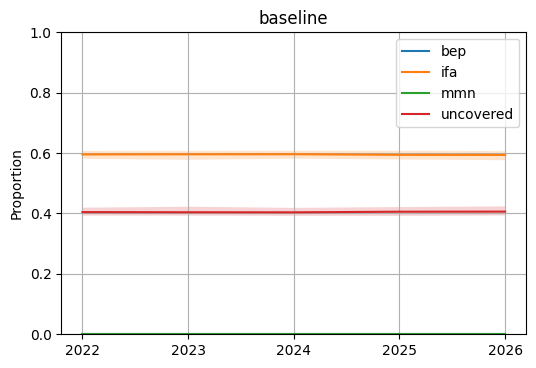

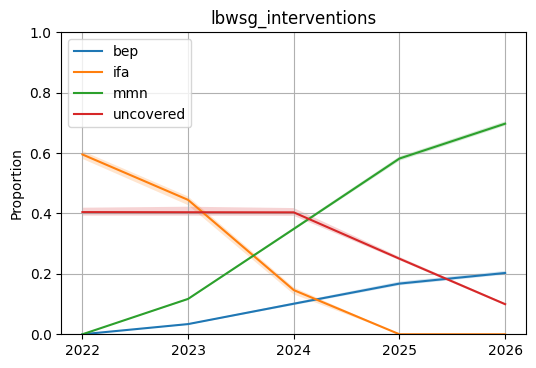

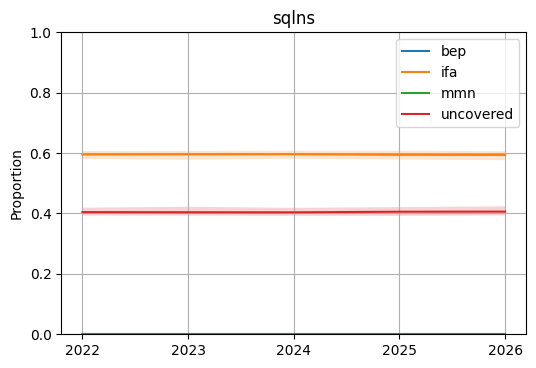

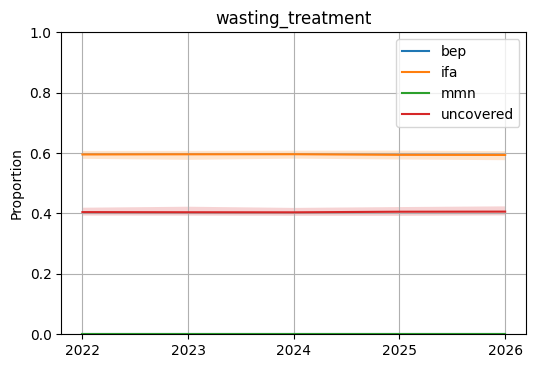

In [9]:
for scenario in cr.reset_index().scenario.unique():
    plt.figure(dpi=100)
    for regimen in cr.reset_index().maternal_supplementation.unique():
        p = cr.reset_index()
        p = p.loc[p.scenario==scenario]
        p = p.loc[p.maternal_supplementation==regimen]
        plt.plot(p.year, p['value','mean'], label=regimen)
        plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
    plt.legend()
    plt.ylim(0,1)
    plt.title(f'{scenario}')
    plt.ylabel('Proportion')
    plt.xticks(p.year.unique())
    plt.grid()
    
# conclusion:

    # looks as expected... baseline IFA coverage decreases before baseline uncovered
    # expected target rate
    # wiggles in lines are due to date cut off subtleties
    # should make this into a bar chart or something if we actually want to present these figures

## ITN coverage

In [10]:
# check coverage
c = birth_count.groupby(['input_draw','scenario','year','insecticide_treated_nets']).sum()
ca = birth_count.groupby(['input_draw','scenario','year']).sum()
cr = (c / ca).groupby(['scenario','year','insecticide_treated_nets']).describe(percentiles=[0.025,0.975])
cr

value                      \
                                                  count      mean       std   
scenario            year insecticide_treated_nets                             
baseline            2022 covered                   12.0  0.266459  0.010828   
                         uncovered                 12.0  0.733541  0.010828   
                    2023 covered                   12.0  0.266131  0.011291   
                         uncovered                 12.0  0.733869  0.011291   
                    2024 covered                   12.0  0.264635  0.009814   
                         uncovered                 12.0  0.735365  0.009814   
                    2025 covered                   12.0  0.264508  0.011912   
                         uncovered                 12.0  0.735492  0.011912   
                    2026 covered                   12.0  0.265412  0.012808   
                         uncovered                 12.0  0.734588  0.012808   
lbwsg_interventions 2022 covered                   12.0  0.266459  0.010828   
                         uncovered                 12.0  0.733541  0.010828   
                    2023 covered                   12.0  0.311781  0.009131   
                         uncovered                 12.0  0.688219  0.009131   
                    2024 covered                   12.0  0.401565  0.004088   
                         uncovered                 12.0  0.598435  0.004088   
                    2025 covered                   12.0  0.493513  0.004131   
                         uncovered                 12.0  0.506487  0.004131   
                    2026 covered                   12.0  0.541363  0.002634   
                         uncovered                 12.0  0.458637  0.002634   
sqlns               2022 covered                   12.0  0.266459  0.010828   
                         uncovered                 12.0  0.733541  0.010828   
                    2023 covered                   12.0  0.266131  0.011291   
                         uncovered                 12.0  0.733869  0.011291   
                    2024 covered                   12.0  0.264635  0.009814   
                         uncovered                 12.0  0.735365  0.009814   
                    2025 covered                   12.0  0.264508  0.011912   
                         uncovered                 12.0  0.735492  0.011912   
                    2026 covered                   12.0  0.265412  0.012808   
                         uncovered                 12.0  0.734588  0.012808   
wasting_treatment   2022 covered                   12.0  0.266459  0.010828   
                         uncovered                 12.0  0.733541  0.010828   
                    2023 covered                   12.0  0.266131  0.011291   
                         uncovered                 12.0  0.733869  0.011291   
                    2024 covered                   12.0  0.264635  0.009814   
                         uncovered                 12.0  0.735365  0.009814   
                    2025 covered                   12.0  0.264508  0.011912   
                         uncovered                 12.0  0.735492  0.011912   
                    2026 covered                   12.0  0.265412  0.012808   
                         uncovered                 12.0  0.734588  0.012808   

                                                                       \
                                                        min      2.5%   
scenario            year insecticide_treated_nets                       
baseline            2022 covered                   0.245459  0.247401   
                         uncovered                 0.719652  0.720317   
                    2023 covered                   0.245261  0.246924   
                         uncovered                 0.721624  0.721637   
                    2024 covered                   0.245557  0.247474   
                         uncovered                 0.724193  0.72469

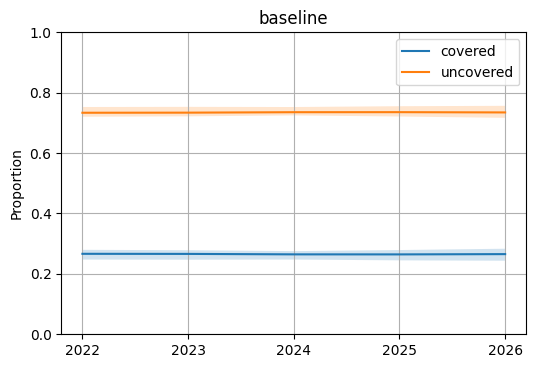

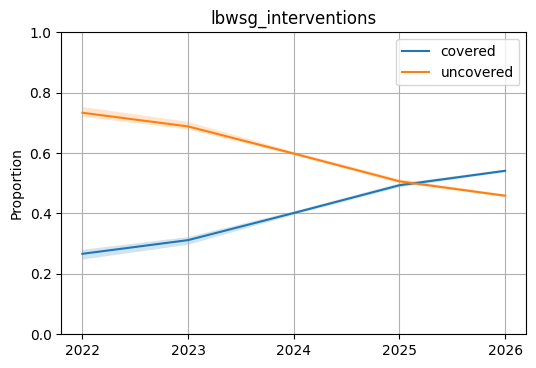

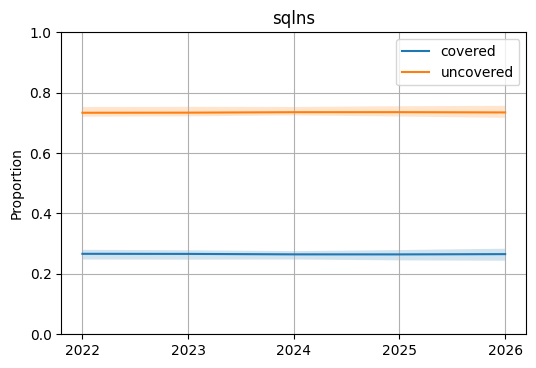

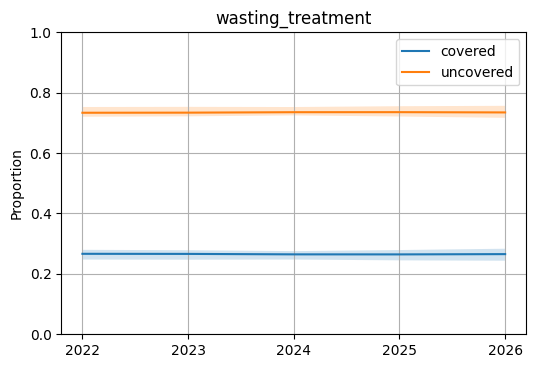

In [11]:
for scenario in cr.reset_index().scenario.unique():
    plt.figure(dpi=100)
    for regimen in cr.reset_index().insecticide_treated_nets.unique():
        p = cr.reset_index()
        p = p.loc[p.scenario==scenario]
        p = p.loc[p.insecticide_treated_nets==regimen]
        plt.plot(p.year, p['value','mean'], label=regimen)
        plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
    plt.legend()
    plt.ylim(0,1)
    plt.title(f'{scenario}')
    plt.ylabel('Proportion')
    plt.xticks(p.year.unique())
    plt.grid()
    
# target rates look good, but doesn't appear to go through scale-up

## Look at correlation between ITNs and maternal supplementation

In [27]:
# check coverage
 
c = birth_count.groupby(['input_draw','scenario','insecticide_treated_nets','maternal_supplementation']).sum()
ca = birth_count.groupby(['input_draw','scenario','insecticide_treated_nets']).sum()
cr = ((c / ca).groupby(['scenario','maternal_supplementation','insecticide_treated_nets'])
      .describe(percentiles=[0.025,0.975])
      .reset_index()
     .drop(columns='year'))
cr.loc[cr.scenario.isin(['baseline','lbwsg_interventions'])]

# looks as expected!

/ihme/code/alibow/miniconda/envs/ciff_sam_38/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


scenario maternal_supplementation insecticide_treated_nets  \
                                                                            
0              baseline                      bep                  covered   
1              baseline                      bep                uncovered   
2              baseline                      ifa                  covered   
3              baseline                      ifa                uncovered   
4              baseline                      mmn                  covered   
5              baseline                      mmn                uncovered   
6              baseline                uncovered                  covered   
7              baseline                uncovered                uncovered   
8   lbwsg_interventions                      bep                  covered   
9   lbwsg_interventions                      bep                uncovered   
10  lbwsg_interventions                      ifa                  covered   
11  lbwsg_interventions                      ifa                uncovered   
12  lbwsg_interventions                      mmn                  covered   
13  lbwsg_interventions                      mmn                uncovered   
14  lbwsg_interventions                uncovered                  covered   
15  lbwsg_interventions                uncovered                uncovered   

   value                                                                        
   count      mean       std       min      2.5%       50%     97.5%       max  
0   12.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1   12.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2   12.0  0.594238  0.008672  0.578734  0.579219  0.597183  0.604609  0.605533  
3   12.0  0.595416  0.009029  0.577179  0.579184  0.598128  0.606622  0.607884  
4   12.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5   12.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
6   12.0  0.405762  0.008672  0.394467  0.395391  0.402817  0.420781  0.421266  
7   12.0  0.404584  0.009029  0.392116  0.393378  0.401872  0.420816  0.422821  
8   12.0  0.122133  0.002879  0.116348  0.116755  0.122960  0.126002  0.126515  
9   12.0  0.086963  0.002165  0.083502  0.083539  0.086920  0.090060  0.090375  
10  12.0  0.174289  0.005344  0.163392  0.164304  0.175346  0.179990  0.180174  
11  12.0  0.279949  0.005731  0.269454  0.269716  0.281504  0.286499  0.286823  
12  12.0  0.419952  0.004843  0.410683  0.411539  0.421227  0.426653  0.427049  
13  12.0  0.301131  0.002722  0.295888  0.296309  0.301467  0.304521  0.304959  
14  12.0  0.283625  0.004592  0.277539  0.277937  0.282398  0.292467  0.293207  
15  12.0  0.331957  0.006430  0.323859  0.324325  0.331676  0.343432  0.345428

In [26]:
# now check the reverse
 
c = birth_count.groupby(['input_draw','scenario','maternal_supplementation','insecticide_treated_nets']).sum()
ca = birth_count.groupby(['input_draw','scenario','maternal_supplementation']).sum()
cr = ((c / ca).groupby(['scenario','insecticide_treated_nets','maternal_supplementation'])
      .describe(percentiles=[0.025,0.975])
      .reset_index()
     .drop(columns='year'))
cr.loc[cr.scenario.isin(['baseline','lbwsg_interventions'])].dropna()

# looks a little noisy... but likely small numbers

/ihme/code/alibow/miniconda/envs/ciff_sam_38/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


scenario insecticide_treated_nets maternal_supplementation  \
                                                                            
1              baseline                  covered                      ifa   
3              baseline                  covered                uncovered   
5              baseline                uncovered                      ifa   
7              baseline                uncovered                uncovered   
8   lbwsg_interventions                  covered                      bep   
9   lbwsg_interventions                  covered                      ifa   
10  lbwsg_interventions                  covered                      mmn   
11  lbwsg_interventions                  covered                uncovered   
12  lbwsg_interventions                uncovered                      bep   
13  lbwsg_interventions                uncovered                      ifa   
14  lbwsg_interventions                uncovered                      mmn   
15  lbwsg_interventions                uncovered                uncovered   

   value                                                                        
   count      mean       std       min      2.5%       50%     97.5%       max  
1   12.0  0.265038  0.010776  0.244169  0.246392  0.266277  0.278800  0.279985  
3   12.0  0.266020  0.011816  0.243468  0.245998  0.269098  0.278569  0.278674  
5   12.0  0.734962  0.010776  0.720015  0.721200  0.733723  0.753608  0.755831  
7   12.0  0.733980  0.011816  0.721326  0.721431  0.730902  0.754002  0.756532  
8   12.0  0.486553  0.004441  0.479134  0.479260  0.487017  0.491574  0.491949  
9   12.0  0.295834  0.009291  0.277446  0.279398  0.298067  0.307724  0.308670  
10  12.0  0.484783  0.002715  0.479945  0.480644  0.484657  0.489320  0.489908  
11  12.0  0.365720  0.007701  0.350498  0.352563  0.367973  0.375241  0.375666  
12  12.0  0.513447  0.004441  0.508051  0.508426  0.512983  0.520740  0.520866  
13  12.0  0.704166  0.009291  0.691330  0.692276  0.701933  0.720602  0.722554  
14  12.0  0.515217  0.002715  0.510092  0.510680  0.515343  0.519356  0.520055  
15  12.0  0.634280  0.007701  0.624334  0.624759  0.632027  0.647437  0.649502

## Check that BEP/MMS coverage are logical by maternal malnutrition status

In [14]:
c = birth_count.groupby(['input_draw','scenario','year','maternal_malnutrition','maternal_supplementation']).sum()
ca = birth_count.groupby(['input_draw','scenario','year','maternal_malnutrition']).sum()
cr = (c / ca).reset_index()
assert np.all(cr.loc[(cr.maternal_malnutrition=='cat1')&(cr.maternal_supplementation=='mmn')]['value']==0), 'Malnourished mothers getting MMN'
assert np.all(cr.loc[(cr.maternal_malnutrition=='cat2')&(cr.maternal_supplementation=='bep')]['value']==0), 'Non-malnourished mothers getting BEP'

# Check maternal regimen effects

In [15]:
cols = ['input_draw','scenario','year','maternal_malnutrition','maternal_supplementation']
b = bw_sum.groupby(cols).sum()#.drop(columns='year')
bc = birth_count.groupby(cols).sum()#.drop(columns='year')
bw = (b/bc).groupby([c for c in cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
bw.dropna().head(10)

value  \
                                                             count   
scenario year maternal_malnutrition maternal_supplementation         
baseline 2022 cat1                  ifa                       12.0   
                                    uncovered                 12.0   
              cat2                  ifa                       12.0   
                                    uncovered                 12.0   
         2023 cat1                  ifa                       12.0   
                                    uncovered                 12.0   
              cat2                  ifa                       12.0   
                                    uncovered                 12.0   
         2024 cat1                  ifa                       12.0   
                                    uncovered                 12.0   

                                                                           \
                                                                     mean   
scenario year maternal_malnutrition maternal_supplementation                
baseline 2022 cat1                  ifa                       3126.838166   
                                    uncovered                 3062.533961   
              cat2                  ifa                       3253.034631   
                                    uncovered                 3194.316226   
         2023 cat1                  ifa                       3120.612852   
                                    uncovered                 3065.855703   
              cat2                  ifa                       3254.147172   
                                    uncovered                 3200.586217   
         2024 cat1                  ifa                       3124.933289   
                                    uncovered                 3059.829149   

                                                                         \
                                                                    std   
scenario year maternal_malnutrition maternal_supplementation              
baseline 2022 cat1                  ifa                       33.327564   
                                    uncovered                 30.617750   
              cat2                  ifa                       24.814901   
                                    uncovered                 24.977301   
         2023 cat1                  ifa                       35.327715   
                                    uncovered                 42.139751   
              cat2                  ifa                       24.804819   
                                    uncovered                 25.495216   
         2024 cat1                  ifa                       28.934729   
                                    uncovered                 35.779347   

                                                                           \
                                                                      min   
scenario year maternal_malnutrition maternal_supplementation                
baseline 2022 cat1                  ifa                       3064.815688   
                                    uncovered                 3015.580614   
              cat2                  ifa                       3204.563315   
                                    uncovered                 3163.720339   
         2023 cat1                  ifa                       3064.551380   
                                    uncovered                 3000.358936   
              cat2                  ifa                       3193.867917   
                                    uncovered                 3160.193506   
         2024 cat1                  ifa                       3080.746409   
                                    uncovered                 3020.246968   

                                                                           \
                                                                     2.5%   
scenario year ma

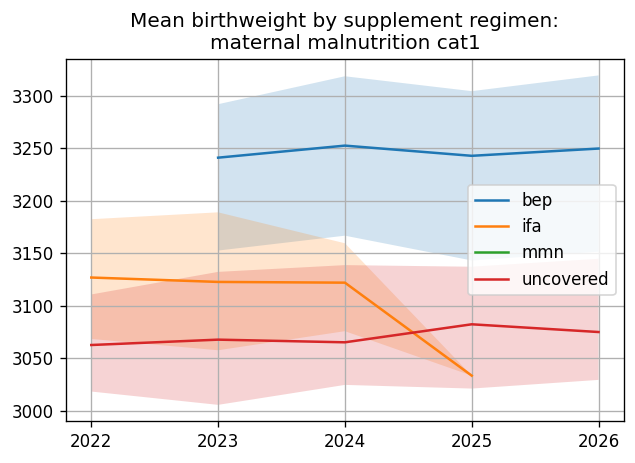

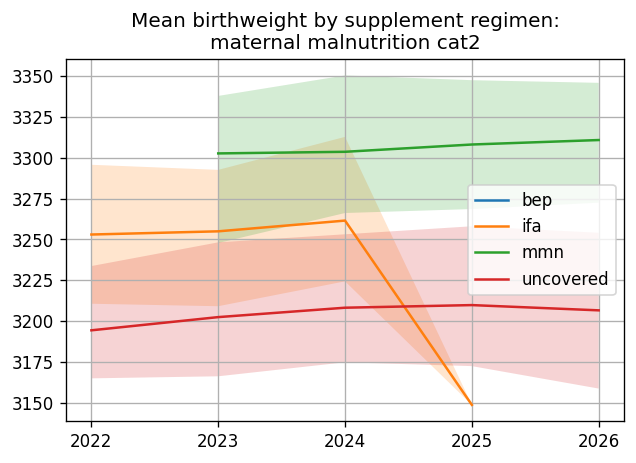

In [16]:
p = bw.reset_index()
p = p.loc[p.scenario=='lbwsg_interventions']
for cat in p.maternal_malnutrition.unique():
    plt.figure(dpi=120)
    for regimen in p.maternal_supplementation.unique():
        pp = p.loc[(p.maternal_malnutrition==cat)&(p.maternal_supplementation==regimen)]
        plt.plot(pp.year, pp['value','mean'], label=regimen)
        plt.fill_between(pp.year, pp['value','2.5%'], pp['value','97.5%'],alpha=.20)
    plt.title(f'Mean birthweight by supplement regimen:\nmaternal malnutrition {cat}')
    plt.legend()
    plt.grid()
    plt.xticks(pp.year.unique())

In [17]:
# obervation in 2025 for ifa looks weird... investigate
birth_count.loc[(birth_count.scenario=='lbwsg_interventions')
               &(birth_count.year==2025)
               &(birth_count.maternal_malnutrition=='cat2')
               &(birth_count.maternal_supplementation=='ifa')
               ]['value'].describe()

# just two births that occur in this strata... 
# don't need to worry about it

count    48.000000
mean      0.083333
std       0.403882
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: value, dtype: float64

In [18]:
cols = ['input_draw','scenario','maternal_malnutrition','maternal_supplementation']
b = bw_sum.groupby(cols).sum().drop(columns='year')
bc = birth_count.groupby(cols).sum().drop(columns='year')
bw = (b/bc).reset_index()
ifa = bw.loc[bw.maternal_supplementation=='ifa'].drop(columns='maternal_supplementation')
mmn = bw.loc[bw.maternal_supplementation=='mmn'].drop(columns='maternal_supplementation')
bep = bw.loc[bw.maternal_supplementation=='bep'].drop(columns='maternal_supplementation')
uncovered = bw.loc[bw.maternal_supplementation=='uncovered'].drop(columns='maternal_supplementation')

ifa_shift = ((ifa.set_index([c for c in ifa.columns if c != 'value']) 
             - uncovered.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))
ifa_shift

# always positive
# target: +57.73 g (7.66 to 107.79)
# looks reasonable

value                        \
                                          count       mean        std   
scenario            maternal_malnutrition                               
baseline            cat1                   12.0  57.882503  19.573698   
                    cat2                   12.0  54.414810  23.215442   
lbwsg_interventions cat1                   12.0  56.178395  24.665685   
                    cat2                   12.0  51.591674  26.161667   
sqlns               cat1                   12.0  57.882503  19.573698   
                    cat2                   12.0  54.414810  23.215442   
wasting_treatment   cat1                   12.0  57.882503  19.573698   
                    cat2                   12.0  54.414810  23.215442   

                                                                            \
                                                 min       2.5%        50%   
scenario            maternal_malnutrition                                    
baseline            cat1                   21.230071  25.462374  57.524685   
                    cat2                   23.705025  24.663483  52.263490   
lbwsg_interventions cat1                   23.735467  26.020416  49.369309   
                    cat2                   18.114658  18.630166  47.479172   
sqlns               cat1                   21.230071  25.462374  57.524685   
                    cat2                   23.705025  24.663483  52.263490   
wasting_treatment   cat1                   21.230071  25.462374  57.524685   
                    cat2                   23.705025  24.663483  52.263490   

                                                                   
                                                97.5%         max  
scenario            maternal_malnutrition                          
baseline            cat1                    88.035890   91.550505  
                    cat2                    92.699651   94.885956  
lbwsg_interventions cat1                   101.373697  108.881984  
                    cat2                    94.353462   99.122738  
sqlns               cat1                    88.035890   91.550505  
                    cat2                    92.699651   94.885956  
wasting_treatment   cat1                    88.035890   91.550505  
                    cat2                    92.699651   94.885956

In [19]:
# but why was lbwsg/cat1 lower than all the rest??
# let's check the same thing stratified by year this time

cols = ['input_draw','scenario','maternal_malnutrition','year','maternal_supplementation']
b = bw_sum.groupby(cols).sum()
bc = birth_count.groupby(cols).sum()
bw = (b/bc).reset_index()
ifa = bw.loc[bw.maternal_supplementation=='ifa'].drop(columns='maternal_supplementation')
mmn = bw.loc[bw.maternal_supplementation=='mmn'].drop(columns='maternal_supplementation')
bep = bw.loc[bw.maternal_supplementation=='bep'].drop(columns='maternal_supplementation')
uncovered = bw.loc[bw.maternal_supplementation=='uncovered'].drop(columns='maternal_supplementation')

ifa_shift = ((ifa.set_index([c for c in ifa.columns if c != 'value']) 
             - uncovered.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','year','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))
ifa_shift

# there's a lot of variation by year!
# lower value for lbwsg/cat1 in previous dataframe can be explained by stochastic variation because it is a small strata

value                        \
                                               count       mean        std   
scenario            year maternal_malnutrition                               
baseline            2022 cat1                   12.0  64.304205  26.921883   
                         cat2                   12.0  58.718405  26.174369   
                    2023 cat1                   12.0  54.757149  32.268787   
                         cat2                   12.0  53.560955  26.180898   
                    2024 cat1                   12.0  65.104140  30.933995   
                         cat2                   12.0  51.912420  22.817385   
                    2025 cat1                   12.0  45.403913  23.110391   
                         cat2                   12.0  57.365765  25.546497   
                    2026 cat1                   12.0  59.773302  19.492849   
                         cat2                   12.0  50.442689  23.133734   
lbwsg_interventions 2022 cat1                   12.0  64.304205  26.921883   
                         cat2                   12.0  58.718405  26.174369   
                    2023 cat1                   12.0  55.004116  31.977186   
                         cat2                   12.0  52.588602  27.155295   
                    2024 cat1                   12.0  56.841203  41.944884   
                         cat2                   12.0  53.402990  24.934285   
                    2025 cat1                    1.0 -20.087454        NaN   
                         cat2                    1.0 -46.572561        NaN   
                    2026 cat1                    0.0        NaN        NaN   
                         cat2                    0.0        NaN        NaN   
sqlns               2022 cat1                   12.0  64.304205  26.921883   
                         cat2                   12.0  58.718405  26.174369   
                    2023 cat1                   12.0  54.757149  32.268787   
                         cat2                   12.0  53.560955  26.180898   
                    2024 cat1                   12.0  65.104140  30.933995   
                         cat2                   12.0  51.912420  22.817385   
                    2025 cat1                   12.0  45.403913  23.110391   
                         cat2                   12.0  57.365765  25.546497   
                    2026 cat1                   12.0  59.773302  19.492849   
                         cat2                   12.0  50.442689  23.133734   
wasting_treatment   2022 cat1                   12.0  64.304205  26.921883   
                         cat2                   12.0  58.718405  26.174369   
                    2023 cat1                   12.0  54.757149  32.268787   
                         cat2                   12.0  53.560955  26.180898   
                    2024 cat1                   12.0  65.104140  30.933995   
                         cat2                   12.0  51.912420  22.817385   
                    2025 cat1                   12.0  45.403913  23.110391   
                         cat2                   12.0  57.365765  25.546497   
                    2026 cat1                   12.0  59.773302  19.492849   
                         cat2                   12.0  50.442689  23.133734   

                                                                      \
                                                      min       2.5%   
scenario            year maternal_malnutrition                         
baseline            2022 cat1                   24.780180  24.960489   
                         cat2                   26.638958  27.337323   
                    2023 cat1                    9.359934  13.404414   
                         cat2                   16.354264  17.660425   
                    2024 cat1                   -5.735708   0.986653   
                         cat2                   16.213421  19.736507   
                    2025 cat1               

In [20]:
mmn_shift = ((mmn.set_index([c for c in ifa.columns if c != 'value']) 
             - ifa.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))


# always positive
# target: +45.16 (32.31 to 58.02)
mmn_shift

value                        \
                                          count       mean        std   
scenario            maternal_malnutrition                               
baseline            cat1                    0.0        NaN        NaN   
                    cat2                    0.0        NaN        NaN   
lbwsg_interventions cat1                    0.0        NaN        NaN   
                    cat2                   25.0  49.023224  24.926361   
sqlns               cat1                    0.0        NaN        NaN   
                    cat2                    0.0        NaN        NaN   
wasting_treatment   cat1                    0.0        NaN        NaN   
                    cat2                    0.0        NaN        NaN   

                                                                            \
                                                 min       2.5%        50%   
scenario            maternal_malnutrition                                    
baseline            cat1                         NaN        NaN        NaN   
                    cat2                         NaN        NaN        NaN   
lbwsg_interventions cat1                         NaN        NaN        NaN   
                    cat2                   12.733638  21.409712  44.780434   
sqlns               cat1                         NaN        NaN        NaN   
                    cat2                         NaN        NaN        NaN   
wasting_treatment   cat1                         NaN        NaN        NaN   
                    cat2                         NaN        NaN        NaN   

                                                                   
                                                97.5%         max  
scenario            maternal_malnutrition                          
baseline            cat1                          NaN         NaN  
                    cat2                          NaN         NaN  
lbwsg_interventions cat1                          NaN         NaN  
                    cat2                   102.249805  146.414999  
sqlns               cat1                          NaN         NaN  
                    cat2                          NaN         NaN  
wasting_treatment   cat1                          NaN         NaN  
                    cat2                          NaN         NaN

In [21]:
bep_shift = ((bep.set_index([c for c in ifa.columns if c != 'value']) 
             - ifa.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))

bep_shift
# always positive
# target: +45.16 (32.31 to 58.02) +66.96g (13.13 to 120.78) =~ 111
# looks reasonable

value                        \
                                          count        mean       std   
scenario            maternal_malnutrition                               
baseline            cat1                    0.0         NaN       NaN   
                    cat2                    0.0         NaN       NaN   
lbwsg_interventions cat1                   25.0  123.544665  45.66783   
                    cat2                    0.0         NaN       NaN   
sqlns               cat1                    0.0         NaN       NaN   
                    cat2                    0.0         NaN       NaN   
wasting_treatment   cat1                    0.0         NaN       NaN   
                    cat2                    0.0         NaN       NaN   

                                                                             \
                                                 min       2.5%         50%   
scenario            maternal_malnutrition                                     
baseline            cat1                         NaN        NaN         NaN   
                    cat2                         NaN        NaN         NaN   
lbwsg_interventions cat1                   38.116724  44.415352  120.486207   
                    cat2                         NaN        NaN         NaN   
sqlns               cat1                         NaN        NaN         NaN   
                    cat2                         NaN        NaN         NaN   
wasting_treatment   cat1                         NaN        NaN         NaN   
                    cat2                         NaN        NaN         NaN   

                                                                   
                                                97.5%         max  
scenario            maternal_malnutrition                          
baseline            cat1                          NaN         NaN  
                    cat2                          NaN         NaN  
lbwsg_interventions cat1                   211.365678  219.094206  
                    cat2                          NaN         NaN  
sqlns               cat1                          NaN         NaN  
                    cat2                          NaN         NaN  
wasting_treatment   cat1                          NaN         NaN  
                    cat2                          NaN         NaN

## check ITN effect size

In [22]:
cols = ['input_draw','scenario','year','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum()#.drop(columns='year')
bc = birth_count.groupby(cols).sum()#.drop(columns='year')
bw = (b/bc).groupby([c for c in cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
bw.dropna().head(10)

value                          \
                                       count         mean        std   
scenario year insecticide_treated_nets                                 
baseline 2022 covered                   12.0  3225.921375  26.526569   
              uncovered                 12.0  3191.779828  25.001502   
         2023 covered                   12.0  3233.206538  23.737774   
              uncovered                 12.0  3191.611154  27.517549   
         2024 covered                   12.0  3233.693133  30.966392   
              uncovered                 12.0  3192.764366  24.529691   
         2025 covered                   12.0  3230.014584  27.942287   
              uncovered                 12.0  3192.474155  25.736899   
         2026 covered                   12.0  3230.221482  26.459047   
              uncovered                 12.0  3192.815821  23.684686   

                                                                               \
                                                min         2.5%          50%   
scenario year insecticide_treated_nets                                          
baseline 2022 covered                   3191.448336  3193.499901  3223.287196   
              uncovered                 3139.065267  3148.027276  3192.070054   
         2023 covered                   3194.119228  3200.093695  3227.453961   
              uncovered                 3130.041966  3140.601884  3191.139004   
         2024 covered                   3198.539378  3199.333248  3226.606776   
              uncovered                 3143.014576  3151.452458  3189.892596   
         2025 covered                   3193.019019  3194.847303  3225.972315   
              uncovered                 3135.458681  3146.909219  3190.717062   
         2026 covered                   3197.999547  3198.892227  3229.384553   
              uncovered                 3143.011307  3151.581940  3197.128103   

                                                                  
                                              97.5%          max  
scenario year insecticide_treated_nets                            
baseline 2022 covered                   3268.926122  3270.451048  
              uncovered                 3227.666591  3231.732764  
         2023 covered                   3278.075353  3279.816688  
              uncovered                 3234.794389  3241.585204  
         2024 covered                   3288.492314  3292.607009  
              uncovered                 3235.877503  3243.914976  
         2025 covered                   3280.160337  3283.335639  
              uncovered                 3234.149319  3242.503157  
         2026 covered                   3279.277230  3282.933354  
              uncovered                 3229.037672  3235.064157

In [23]:
cols = ['input_draw','scenario','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum().drop(columns='year')
bc = birth_count.groupby(cols).sum().drop(columns='year')
bw = (b/bc).reset_index()
covered = bw.loc[bw.insecticide_treated_nets=='covered'].drop(columns='insecticide_treated_nets')
uncovered = bw.loc[bw.insecticide_treated_nets=='uncovered'].drop(columns='insecticide_treated_nets')

itn_shift = ((covered.set_index([c for c in covered.columns if c != 'value']) 
             - uncovered.set_index([c for c in covered.columns if c != 'value']))
              .groupby(['scenario']).describe(percentiles=[0.025,0.975]))
itn_shift

# target is 33 (95% CI: 5, 62)

# seeing quite a bit of spread
# shift is LARGER in intervention scenario, 
# this is the opposite of what happened earlier... due to observed correlation with maternal supplementation?

value                                             \
                    count       mean        std       min       2.5%   
scenario                                                               
baseline             12.0  38.324287  30.534124 -0.086821   3.844022   
lbwsg_interventions  12.0  50.386536  29.538677  9.843589  13.321370   
sqlns                12.0  38.324287  30.534124 -0.086821   3.844022   
wasting_treatment    12.0  38.324287  30.534124 -0.086821   3.844022   

                                                        
                           50%       97.5%         max  
scenario                                                
baseline             30.146242  100.536934  105.855460  
lbwsg_interventions  43.234164  107.772759  111.889784  
sqlns                30.146242  100.536934  105.855460  
wasting_treatment    30.146242  100.536934  105.855460

In [24]:
cols = ['input_draw','scenario','year','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum()#.drop(columns='year')
bc = birth_count.groupby(cols).sum()#.drop(columns='year')
bw = (b/bc).reset_index()
covered = bw.loc[bw.insecticide_treated_nets=='covered'].drop(columns='insecticide_treated_nets')
uncovered = bw.loc[bw.insecticide_treated_nets=='uncovered'].drop(columns='insecticide_treated_nets')

itn_shift = ((covered.set_index([c for c in covered.columns if c != 'value']) 
             - uncovered.set_index([c for c in covered.columns if c != 'value']))
              .groupby(['scenario','year']).describe(percentiles=[0.025,0.975]))
itn_shift

# don't see high difference when stratified by year... ? 

value                                            \
                         count       mean        std       min      2.5%   
scenario            year                                                   
baseline            2022  12.0  34.141547  29.030944 -9.040687 -5.022810   
                    2023  12.0  41.595384  32.056648  6.473835  8.765278   
                    2024  12.0  40.928768  33.269481 -1.151779  1.152146   
                    2025  12.0  37.540429  31.791604 -7.549945 -2.077774   
                    2026  12.0  37.405661  31.153546  2.435008  3.937314   
lbwsg_interventions 2022  12.0  34.141547  29.030944 -9.040687 -5.022810   
                    2023  12.0  42.653751  32.672069  5.063705  6.982406   
                    2024  12.0  40.447487  32.416522 -6.528257 -3.769861   
                    2025  12.0  38.754288  28.202664  1.781917  6.263900   
                    2026  12.0  36.694514  28.305896  3.207120  4.061148   
sqlns               2022  12.0  34.141547  29.030944 -9.040687 -5.022810   
                    2023  12.0  41.595384  32.056648  6.473835  8.765278   
                    2024  12.0  40.928768  33.269481 -1.151779  1.152146   
                    2025  12.0  37.540429  31.791604 -7.549945 -2.077774   
                    2026  12.0  37.405661  31.153546  2.435008  3.937314   
wasting_treatment   2022  12.0  34.141547  29.030944 -9.040687 -5.022810   
                    2023  12.0  41.595384  32.056648  6.473835  8.765278   
                    2024  12.0  40.928768  33.269481 -1.151779  1.152146   
                    2025  12.0  37.540429  31.791604 -7.549945 -2.077774   
                    2026  12.0  37.405661  31.153546  2.435008  3.937314   

                                                             
                                50%       97.5%         max  
scenario            year                                     
baseline            2022  33.918048   88.486918   93.466977  
                    2023  31.144371  103.344472  104.897471  
                    2024  34.358349  108.161118  118.909229  
                    2025  32.059104  101.417751  104.957429  
                    2026  26.198411  101.282296  107.214472  
lbwsg_interventions 2022  33.918048   88.486918   93.466977  
                    2023  31.779119  105.766775  107.557764  
                    2024  33.770637  101.274246  106.785216  
                    2025  30.160458   93.760383   97.767390  
                    2026  32.343706   89.226655   93.259406  
sqlns               2022  33.918048   88.486918   93.466977  
                    2023  31.144371  103.344472  104.897471  
                    2024  34.358349  108.161118  118.909229  
                    2025  32.059104  101.417751  104.957429  
                    2026  26.198411  101.282296  107.214472  
wasting_treatment   2022  33.918048   88.486918   93.466977  
                    2023  31.144371  103.344472  104.897471  
                    2024  34.358349  108.161118  118.909229  
                    2025  32.059104  101.417751  104.957429  
                    2026  26.198411  101.282296  107.214472

In [25]:
# let's test that theory by stratifying by maternal supplementation regimen

cols = ['input_draw','scenario','maternal_supplementation','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum().drop(columns='year')
bc = birth_count.groupby(cols).sum().drop(columns='year')
bw = (b/bc).reset_index()
covered = bw.loc[bw.insecticide_treated_nets=='covered'].drop(columns='insecticide_treated_nets')
uncovered = bw.loc[bw.insecticide_treated_nets=='uncovered'].drop(columns='insecticide_treated_nets')

itn_shift = ((covered.set_index([c for c in covered.columns if c != 'value']) 
             - uncovered.set_index([c for c in covered.columns if c != 'value']))
              .groupby(['scenario','maternal_supplementation']).describe(percentiles=[0.025,0.975]))
itn_shift.dropna()

# looks reasonable...
# so larger effect must be due to a correlation which is ok

value                        \
                                             count       mean        std   
scenario            maternal_supplementation                               
baseline            ifa                       12.0  39.971163  32.230697   
                    uncovered                 12.0  36.127557  28.394717   
lbwsg_interventions bep                       12.0  36.311362  28.832727   
                    ifa                       12.0  42.061789  33.063389   
                    mmn                       12.0  38.793360  27.970317   
                    uncovered                 12.0  35.888042  30.257418   
sqlns               ifa                       12.0  39.971163  32.230697   
                    uncovered                 12.0  36.127557  28.394717   
wasting_treatment   ifa                       12.0  39.971163  32.230697   
                    uncovered                 12.0  36.127557  28.394717   

                                                                              \
                                                    min      2.5%        50%   
scenario            maternal_supplementation                                   
baseline            ifa                        3.487083  6.196555  30.544413   
                    uncovered                 -5.016313  0.671703  29.837452   
lbwsg_interventions bep                        0.088678  1.166572  34.044757   
                    ifa                        7.225493  8.849549  35.194841   
                    mmn                        6.737778  8.038713  32.182480   
                    uncovered                -13.232912 -6.625687  33.651606   
sqlns               ifa                        3.487083  6.196555  30.544413   
                    uncovered                 -5.016313  0.671703  29.837452   
wasting_treatment   ifa                        3.487083  6.196555  30.544413   
                    uncovered                 -5.016313  0.671703  29.837452   

                                                                      
                                                   97.5%         max  
scenario            maternal_supplementation                          
baseline            ifa                       105.847486  111.743611  
                    uncovered                  93.121259   97.567945  
lbwsg_interventions bep                        94.346683  101.808183  
                    ifa                       106.774811  109.255448  
                    mmn                        90.411182   91.874328  
                    uncovered                  93.378029  100.188207  
sqlns               ifa                       105.847486  111.743611  
                    uncovered                  93.121259   97.567945  
wasting_treatment   ifa                       105.847486  111.743611  
                    uncovered                  93.121259   97.567945